# Part II - Key Insight On the Prosper Loan Analysis
## by Nwachi Joshua

## Investigation Overview


I aim to delve into the intricacies of loan performance and examine the influence of different factors such as homeownership, income range, Prosper risk level, and their effect on key metrics such as borrower APR, borrower rate, debt-to-income ratio, loan original amount and monthly loan payment. Additionally, I'll showcase how loan collections have evolved over tim

## Dataset Overview

Our research on the Prosper loan dataset analyzed 113,937 loans, each with 81 variables, including loan amount, borrower rate, loan status, borrower income, and others. After a thorough evaluation, we cleaned and optimized the dataset for a more in-depth analysis.

In [7]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [9]:
#read the dataset into loan dataframe
df_sub = pd.read_csv('loan_dataset.csv')
df_sub.head()


,ListingCategory,LoanOriginalAmount,Term,CreditScoreRangeLower,LoanOriginationQuarter,LoanStatus,LoanOriginationDate,BorrowerAPR,BorrowerRate,LenderYield,...,EmploymentStatusDuration,ProsperRating (numeric),ProsperRiskLevel,IncomeVerifiable,AvailableBankcardCredit,MonthlyLoanPayment,StatedMonthlyIncome,New_loan_status,month,year
0,Not Available,9425,36,640.0,Q3 2007,Completed,2007-09-12,0.16516,0.1580,0.1380,...,2.0,NaN,NaN,True,1500.0,330.43,3083.333333,Completed,9,2007
1,Home Improvement,10000,36,680.0,Q1 2014,Current,2014-03-03,0.12016,0.0920,0.0820,...,44.0,6.0,Medium,True,10266.0,318.93,6125.000000,Active,3,2014
2,Not Available,3001,36,480.0,Q1 2007,Completed,2007-01-17,0.28269,0.2750,0.2400,...,NaN,NaN,NaN,True,NaN,123.32,2083.333333,Completed,1,2007
3,Motorcycle,10000,36,800.0,Q4 2012,Current,2012-11-01,0.12528,0.0974,0.0874,...,113.0,6.0,Low,True,30754.0,321.45,2875.000000,Active,11,2012
4,Home Improvement,15000,36,680.0,Q3 2013,Current,2013-09-20,0.24614,0.2085,0.1985,...,44.0,3.0,Medium high,True,695.0,563.97,9583.333333,Active,9,2013


## What is the distribution of borrower APR, borrower rate, lender yield, and estimated effective yield?

 The distribution of borrower APR, borrower rate, lender yield, and estimated effective yield were symmetrical with a spike in the 3.0-4.0 range for borrower APR, borrower rate, and lender yield.



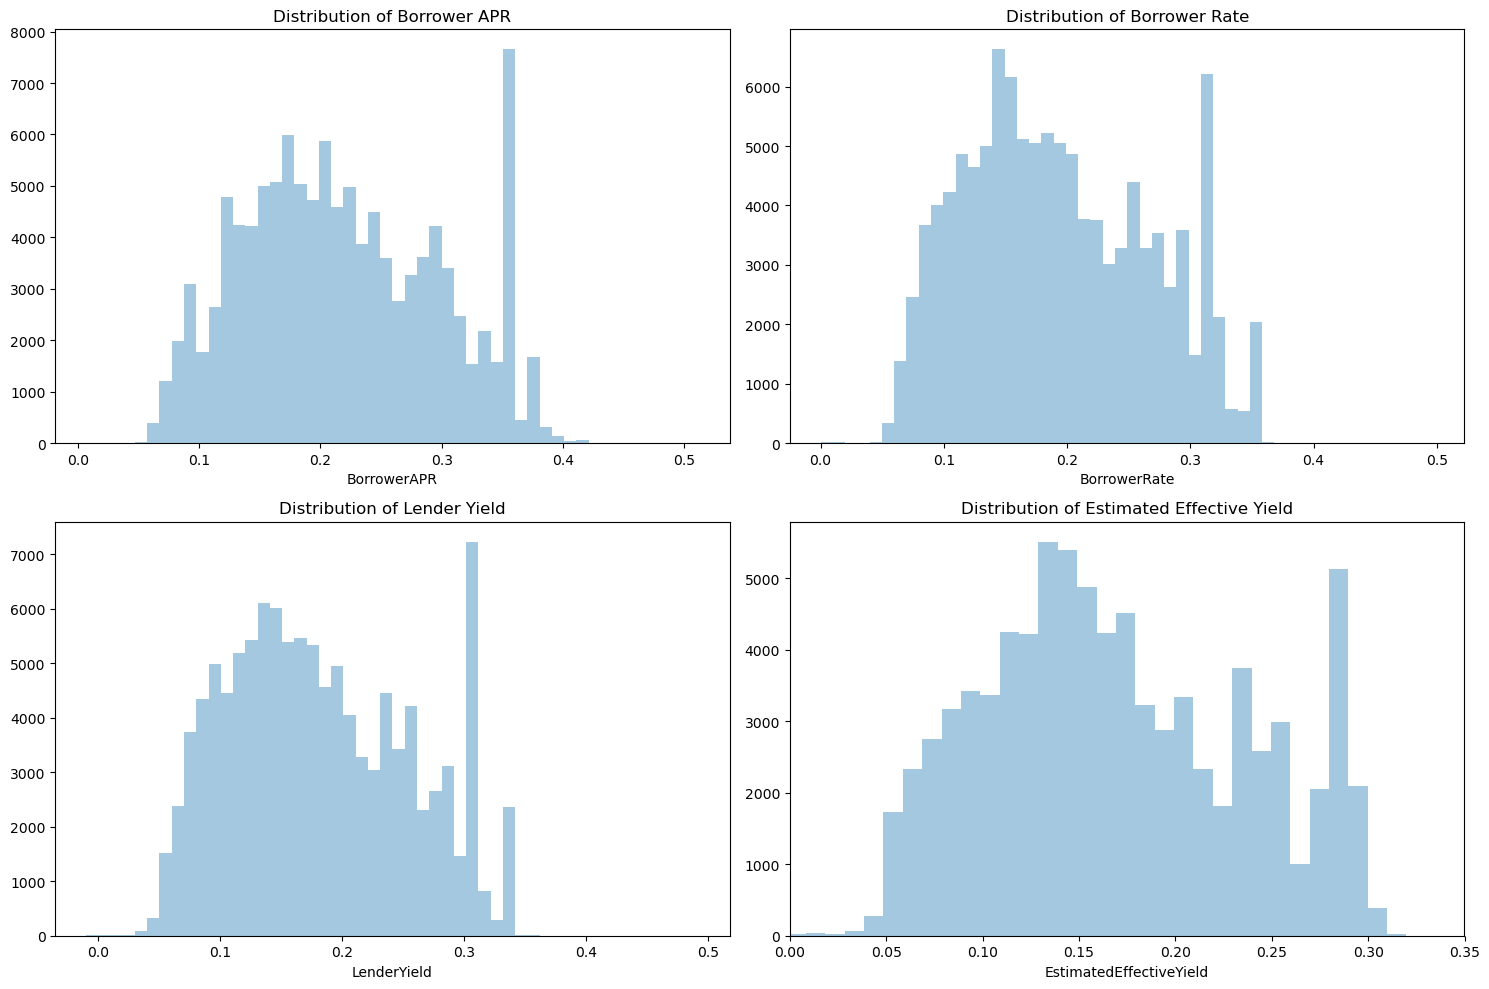

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(15,10))

# Plot the distribution of borrower APR
sns.distplot(df_sub[df_sub['BorrowerAPR'].notnull()]['BorrowerAPR'], ax=ax[0, 0], kde=False)
ax[0, 0].set_title('Distribution of Borrower APR')

# Plot the distribution of borrower rate
sns.distplot(df_sub['BorrowerRate'], ax=ax[0, 1], kde=False)
ax[0, 1].set_title('Distribution of Borrower Rate')

# Plot the distribution of lender yield
sns.distplot(df_sub['LenderYield'], ax=ax[1, 0], kde=False)
ax[1, 0].set_title('Distribution of Lender Yield')


# Plot the distribution of estimated effective yield
sns.distplot(df_sub[df_sub['EstimatedEffectiveYield'].notnull()]['EstimatedEffectiveYield'], ax=ax[1, 1], kde=False)
ax[1, 1].set_title('Distribution of Estimated Effective Yield')
plt.xlim(0,0.35)

# Show the plot
plt.tight_layout()
plt.show()

## How does homeownership impact loan performance?

Homeownership appeared to have an impact on loan performance, with the most common loan status for both homeowners and non-homeowners being "Active", followed by "Completed", and a higher number of "Defaulted" loans for non-homeowners compared to homeowners

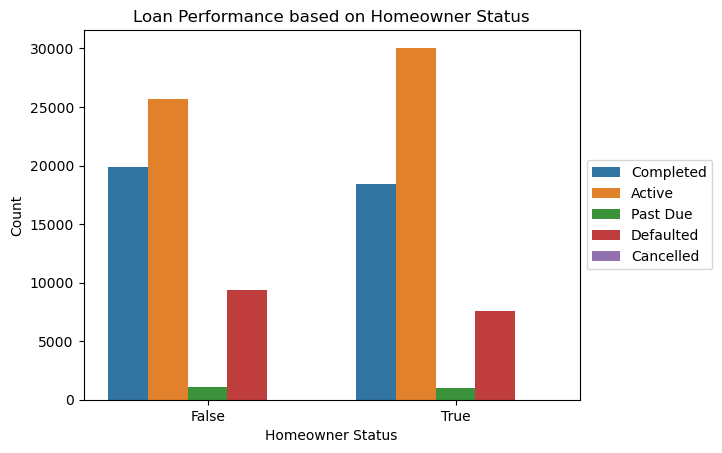

In [11]:

# filter out the missing values for homeowner status
sample = df_sub[df_sub['IsBorrowerHomeowner'].notnull()]

# create the plot
sns.countplot(x='IsBorrowerHomeowner', data=sample, hue='New_loan_status')

# add labels and title
plt.xlabel('Homeowner Status')
plt.ylabel('Count')
plt.title('Loan Performance based on Homeowner Status')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# show plot
plt.show()

## Does the income range have an impact on the borrower APR, borrower rate, or debt-to-income ratio?
Borrower's income range appeared to have an impact on the borrower APR, borrower rate, and debt-to-income ratio, with higher income resulting in lower borrowing costs and improved loan repayment prospects.



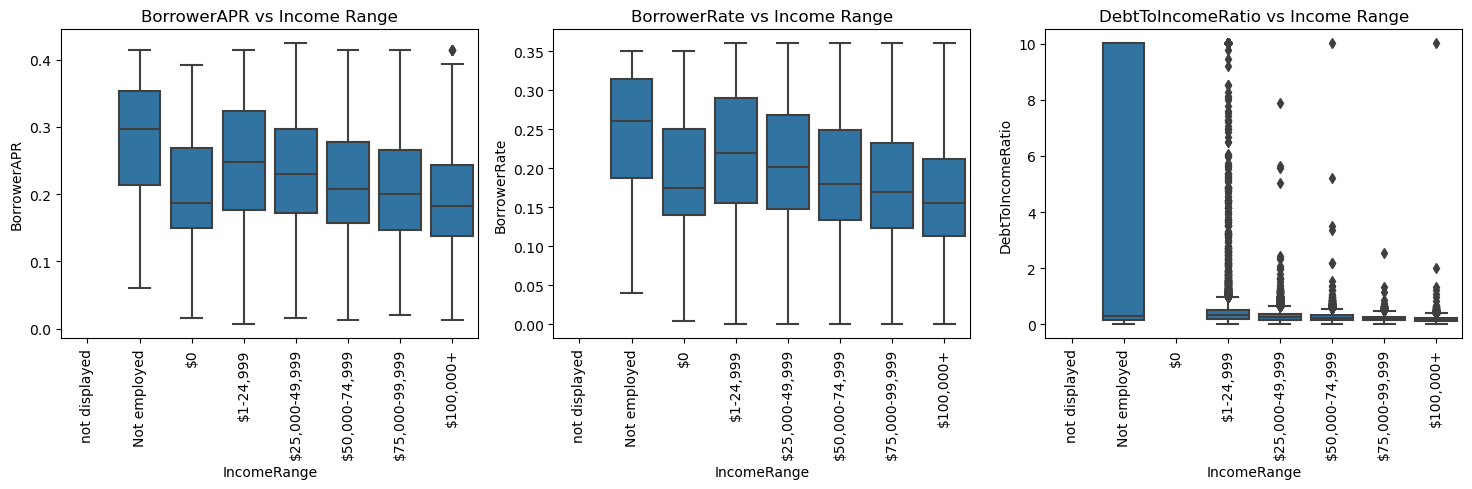

In [12]:
# Create box plots to visualize the relationship between income range and the target variables
plt.figure(figsize=(15,5))
order = ['not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999','$75,000-99,999', '$100,000+']

plt.subplot(1,3,1)
sns.boxplot(x='IncomeRange', y='BorrowerAPR', data=df_sub,order=order,color=sns.color_palette()[0])
plt.title('BorrowerAPR vs Income Range')
plt.xticks(rotation=90)

plt.subplot(1,3,2)
sns.boxplot(x='IncomeRange', y='BorrowerRate', data=df_sub,order=order,color=sns.color_palette()[0])
plt.title('BorrowerRate vs Income Range')
plt.xticks(rotation=90)

plt.subplot(1,3,3)
sns.boxplot(x='IncomeRange', y='DebtToIncomeRatio', data=df_sub,order=order,color=sns.color_palette()[0])
plt.title('DebtToIncomeRatio vs Income Range')

plt.tight_layout()
plt.xticks(rotation=90)
plt.show()


## How does the Prosper risk level impact the loan original amount or monthly loan payment?
Prosper risk level appeared to impact the loan original amount and monthly loan payment, with higher risk levels resulting in smaller loan amounts and lower monthly payments.

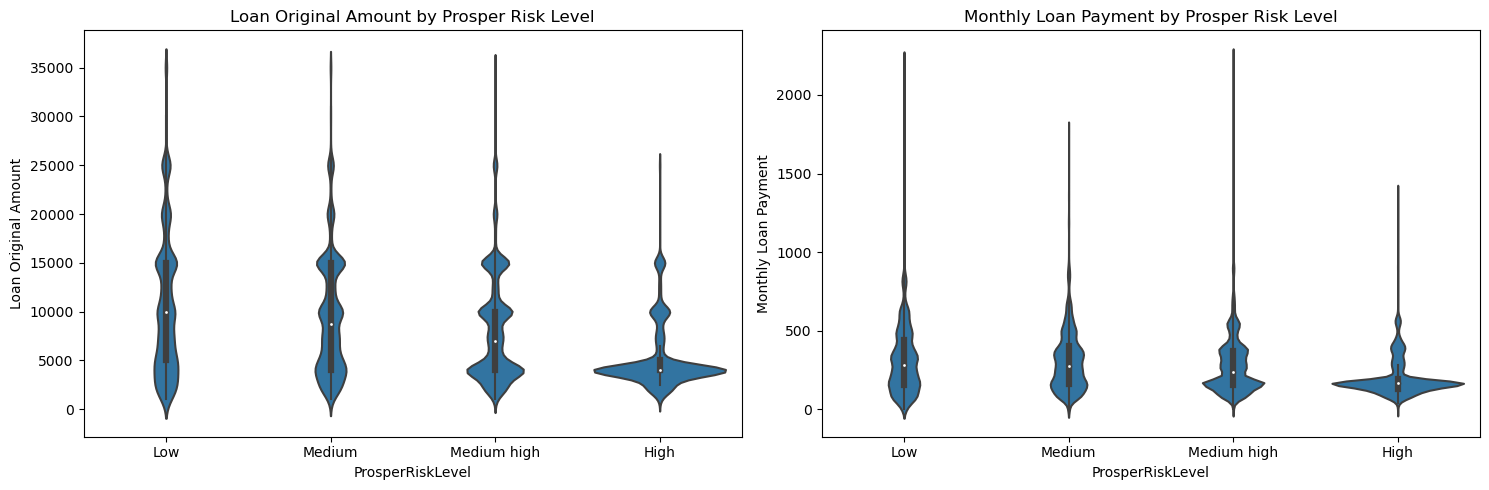

In [14]:
plt.figure(figsize=(15, 5))
order=['Low','Medium','Medium high','High']
plt.subplot(1, 2, 1)
sns.violinplot(data=df_sub,y='LoanOriginalAmount', x='ProsperRiskLevel',order=order,color=sns.color_palette()[0])
plt.title("Loan Original Amount by Prosper Risk Level")
plt.ylabel("Loan Original Amount")

plt.subplot(1, 2, 2)
sns.violinplot(data=df_sub,y='MonthlyLoanPayment', x='ProsperRiskLevel',order=order,color=sns.color_palette()[0])
plt.title("Monthly Loan Payment by Prosper Risk Level")
plt.ylabel("Monthly Loan Payment")

plt.tight_layout()


plt.show()

## What is the trend in the average loan original amount over time?

The average loan original amount showed an upward trend over time with a slight dip observed during 2008-2009.

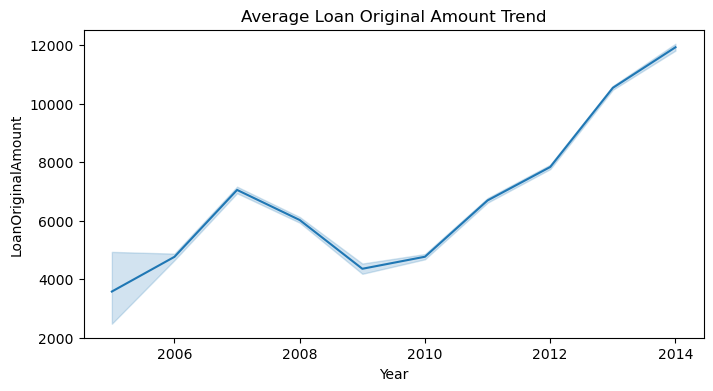

In [15]:
plt.figure(figsize = [8, 4])

sns.lineplot(data = df_sub, x ='year' , y = 'LoanOriginalAmount')

plt.xlabel('Year')
plt.title('Average Loan Original Amount Trend')
plt.show()

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt